In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:

# Load the dataset
data_path = '/content/drive/MyDrive/aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa/SriLanka_Weather_Dataset_updated (1).csv'  # Update with your dataset path
data_set = pd.read_csv(data_path)

In [ ]:


# Columns to drop
need_drop = [
    "temperature_2m_max", "temperature_2m_min", "sunrise", "sunset",
    "apparent_temperature_min", "apparent_temperature_mean",
    "shortwave_radiation_sum", "rain_sum", "apparent_temperature_max",
    "snowfall_sum", "country", "weathercode"
]

# Drop the specified columns
data_set.drop(columns=need_drop, inplace=True)

In [ ]:
# Convert date column to datetime
data_set['time'] = pd.to_datetime(data_set['time'])

In [ ]:
# Fill missing values
data_set.fillna(method='ffill', inplace=True)

In [ ]:
# Filter data for Colombo
city_name = "Jaffna"
colombo_data = data_set[data_set["city"] == city_name].drop('city', axis=1)

In [ ]:
# Set index as datetime and drop 'time' column
colombo_data.set_index('time', inplace=True)

<ipython-input-11-51c23ef9e279>:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_set.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 15, 64)              │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,492 (123.02 KB)

 Trainable params: 31,492 (123.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1413 - val_loss: 0.0240
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0347 - val_loss: 0.0171
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0279 - val_loss: 0.0173
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0269 - val_loss: 0.0150
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0251 - val_loss: 0.0143
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0232 - val_loss: 0.0144
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0214 - val_loss: 0.0130
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0198 - val_loss: 0.0135
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0194 - val_loss: 0.0129
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0183 - val_loss: 0.0126
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0174 - val_loss: 0.0129
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0

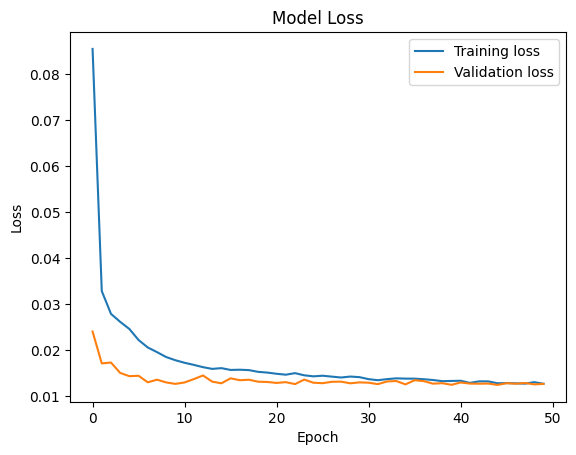

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step

Metrics for temperature_2m_mean:
Mean Absolute Error (MAE): 0.4641164178877429
Mean Squared Error (MSE): 0.3299526675472699
Root Mean Squared Error (RMSE): 0.5744150655643269

Metrics for precipitation_hours:
Mean Absolute Error (MAE): 3.9040675426963394
Mean Squared Error (MSE): 28.570168399161673
Root Mean Squared Error (RMSE): 5.345106958626896

Metrics for precipitation_sum:
Mean Absolute Error (MAE): 4.2037664283529566
Mean Squared Error (MSE): 119.35062921251118
Root Mean Squared Error (RMSE): 10.924771357447769

Metrics for et0_fao_evapotranspiration:
Mean Absolute Error (MAE): 0.5550122983642797
Mean Squared Error (MSE): 0.5022017367804235
Root Mean Squared Error (RMSE): 0.7086619340563055


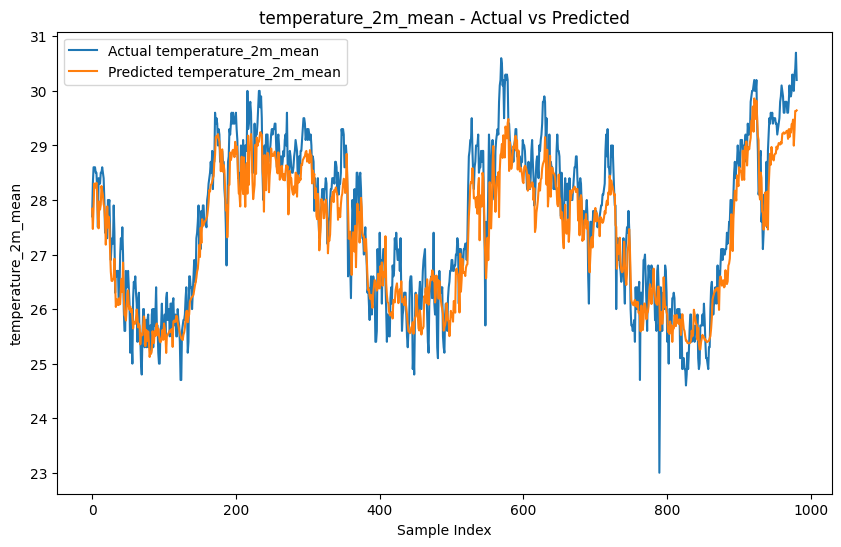

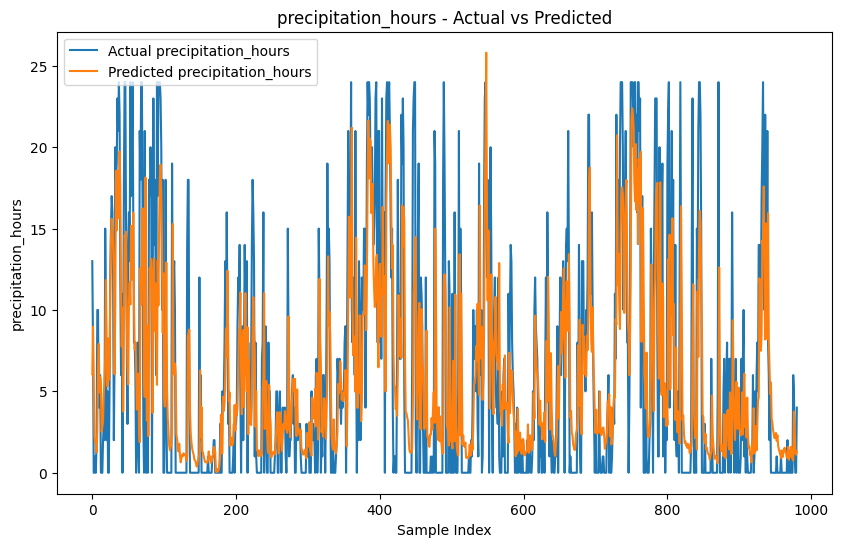

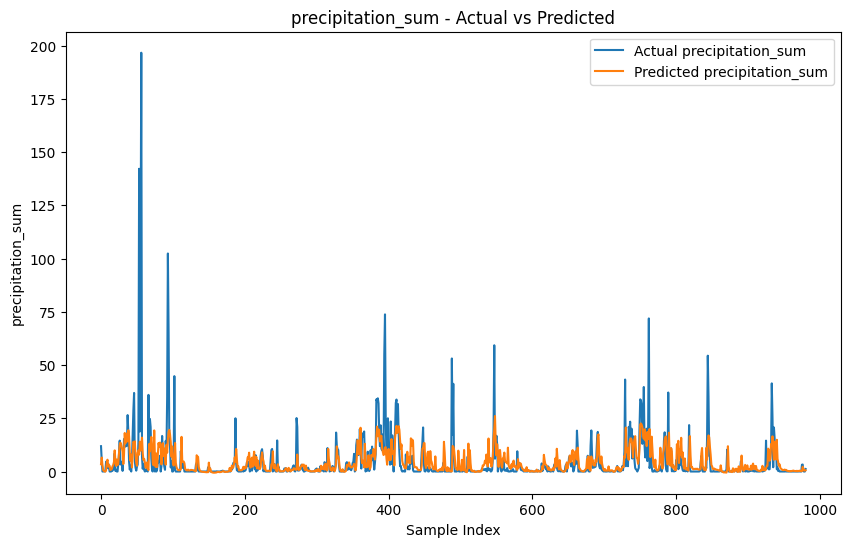

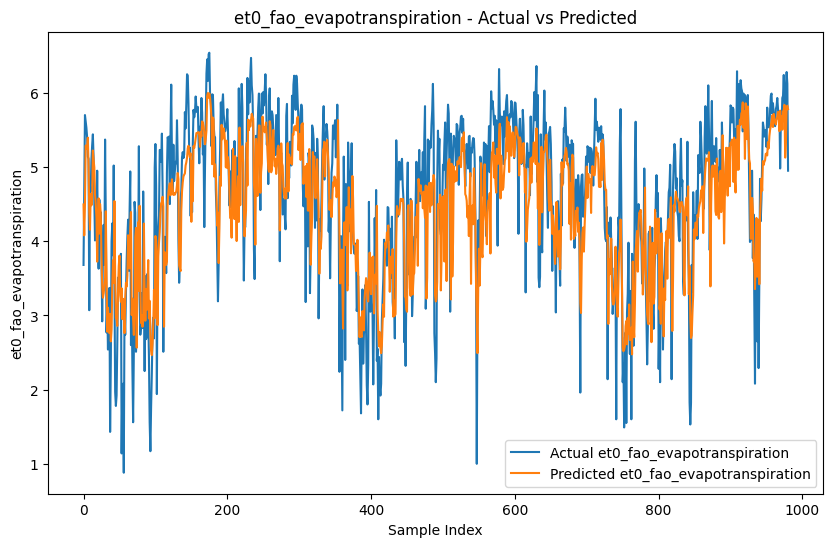

In [ ]:









# Define target and feature columns
target_columns = ['temperature_2m_mean', 'precipitation_hours', 'precipitation_sum', 'et0_fao_evapotranspiration']
feature_columns = [
    'temperature_2m_mean', 'precipitation_hours', 'windspeed_10m_max',
    'windgusts_10m_max', 'winddirection_10m_dominant', 'et0_fao_evapotranspiration',
    'latitude', 'longitude', 'elevation'
]

# Separate features and target
features = colombo_data[feature_columns]
targets = colombo_data[target_columns]

# Normalize the features and targets
scaler_features = MinMaxScaler()
scaler_targets = MinMaxScaler()

scaled_features = scaler_features.fit_transform(features)
scaled_targets = scaler_targets.fit_transform(targets)

# Define time steps and split data
n_past = 15
n_future = 1

# Create sequences for training
X, y = [], []
for i in range(n_past, len(scaled_features) - n_future + 1):
    X.append(scaled_features[i - n_past:i])
    y.append(scaled_targets[i + n_future - 1])

X, y = np.array(X), np.array(y)

# Split into train and test sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(len(target_columns)))  # Output layer matches the number of target columns

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on test set
predictions = model.predict(X_test)
predictions = scaler_targets.inverse_transform(predictions)
y_test_inv = scaler_targets.inverse_transform(y_test)

# Evaluate the model
for i, column in enumerate(target_columns):
    mae = mean_absolute_error(y_test_inv[:, i], predictions[:, i])
    mse = mean_squared_error(y_test_inv[:, i], predictions[:, i])
    rmse = np.sqrt(mse)
    print(f"\nMetrics for {column}:")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)

# Plot actual vs predicted values for each target variable
for i, column in enumerate(target_columns):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_inv[:, i], label='Actual ' + column)
    plt.plot(predictions[:, i], label='Predicted ' + column)
    plt.title(f'{column} - Actual vs Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()
